# Grade: /100 pts

# Assignment 7: Tree-based methods

In this assignment you'll study tree methods. You will use a dataset that contains the premier league matches of soccer between 2010 and 2021. The data has the following variables:

|#|Attribute|Description|
|---|---|---|
|0|home_team|home team|
|1|away_team|away team|
|2|result_full|match result|
|3|home_clearances|home team clearances in the match|
|4|home_corners|home team corners in the match|
|5|home_fouls_conceded|home team fouls conceded in the match|
|6|home_offsides|home team offsides in the match|
|7|home_passes|home team passes in the match|
|8|home_possession|home team possession in the match|
|9|home_red_cards|home team red cards in the match|
|10|home_shots|home team shots in the match|
|11|home_shots_on_target|home team shots on target in the match|
|12|home_tackles|home team tackles in the match|
|13|home_touches|home team touches in the match|
|14|home_yellow_cards|home team yellow cards in the match|
|15|away_clearances|away tem clearances in the match|
|16|away_corners|away team corners in the match|
|17|away_fouls_concedevd|away team fouls conceded in the match|
|18|away_offsides|away team offsides in the match|
|19|away_passes|away team passes in the match|
|20|away_possession|away team possession in the match|
|21|away_red_cards|away team red cards in the match|
|22|away_shots|away team shots in the match|
|23|away_shots_on_target|away team shots on target in the match|
|24|away_tackles|away team tackles in the match|
|25|away_touches|away team touches in the match|
|26|away_yellow_cards|away team yellow cards in the match|
|27|clearances_avg_home|average home team clearances in the season; accumulated until the last match|
|28|corners_avg_home|average home team corners in the season; accumulated until the last match|
|29|fouls_conceded_avg_home|average home team fouls conceded in the season; accumulated until the last match|
|30|offsides_avg_home|average home team offsides in the season; accumulated until the last match|
|31|passes_avg_home|average home team passes in the season; accumulated until the last match|
|32|possession_avg_home|average home team possession in the season; accumulated until the last match|
|33|red_cards_avg_home|average home team red cards in the season; accumulated until the last match|
|34|shots_on_target_avg_home|average home team shots on target in the season; accumulated until the last match|
|35|tackles_avg_home|average home team tackles in the season; accumulated until the last match|
|36|touches_avg_home|average home team touches in the season; accumulated until the last match|
|37|yellow_cards_avg_home|average home team yellow cards in the season; accumulated until the last match|
|38|goals_scored_ft_avg_home|average home team goals scored in the season; accumulated until the last match|
|39|goals_conced_ft_avg_home|average home team goals conceded in the season; accumulated until the last match|
|40|sg_match_ft_acum_home|goals difference in the season; accumulated until the last match|
|41|goals_scored_ht_avg_home|average home team goals scored in 1st time in the season; accumulated until the last match|
|42|goals_conced_ht_avg_home|average home team goals conceded in 1st time in the season; accumulated until the last match|
|43|clearances_avg_away|average away team clearances in the season; accumulated until the last match|
|44|corners_avg_away|average away team corners in the season; accumulated until the last match|
|45|fouls_conceded_avg_away|average away team fouls conceded in the season; accumulated until the last match|
|46|offsides_avg_away|average away team offsides in the season; accumulated until the last match|
|47|passes_avg_away|average away team passes in the season; accumulated until the last match|
|48|possession_avg_away|average away team possession in the season; accumulated until the last match|
|49|red_cards_avg_away|average away team red cards in the season; accumulated until the last match|
|50|shots_on_target_avg_away|average away team shots on target in the season; accumulated until the last match|
|51|tackles_avg_away|average away team tackles in the season; accumulated until the last match|
|52|touches_avg_away|average away team touches in the season; accumulated until the last match|
|53|yellow_cards_avg_away|average away team yellow cards in the season; accumulated until the last match|
|54|goals_scored_ft_avg_away|average away team goals scored in the season; accumulated until the last match|
|55|goals_conced_ft_avg_away|average away team goals conceded in the season; accumulated until the last match|
|56|sg_match_ft_acum_away|goals difference in the season; accumulated until the last match|
|57|goals_scored_ht_avg_away|average away team goals scored in 1st time in the season; accumulated until the last match|
|58|goals_conced_ht_avg_away|average away team goals conceded in 1st time in the season; accumulated until the last match|

We aim to predict the outcome of matches. "0" if the home team won, "1" if the away team won, and "2" if the teams finished in a draw.

*Do not forget to label axes in your figures.*

*Take advantage of the flag `n_jobs=-1` where applicable.*

**Points will be deducted if a variable has a different name than the one specified by the question, where applicable.**

### <span style="color:yellow"> Global Toolbox </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.model_selection import  train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# %pip install pydotplus
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

import warnings; warnings.filterwarnings('ignore')
seed = 415
np.random.seed(seed)

### Q1.1 - <span style="color:red">[4]</span> - Load and clean the dataset:

1. Load the dataset.
2. Since we aim to predict the outcomes of matches, we cannot use the variables which were produced during the games such as passes, yellow/red cards etc. Please drop all the variables that you would not have known prior to the match, except for the goals.
3. Store the shape of the dataframe in a variable called <span style="color:pink">**shape_vector**</span> and `print` it.

In [2]:
# Load dataset
df = pd.read_csv('PL_matches.csv')

# Drop all variables that would not have been known prior to the match, the home_* and away_* columns
df = df.drop(columns = [
    'home_clearances', 'away_clearances', 
    'home_corners', 'away_corners', 
    'home_fouls_conceded', 'away_fouls_conceded', 
    'home_offsides', 'away_offsides', 
    'home_passes', 'away_passes', 
    'home_possession', 'away_possession', 
    'home_red_cards', 'away_red_cards', 
    'home_shots', 'away_shots', 
    'home_shots_on_target', 'away_shots_on_target', 
    'home_tackles', 'away_tackles', 
    'home_touches', 'away_touches', 
    'home_yellow_cards', 'away_yellow_cards'
    ]
)

# Store shape of the dataframe as shape_vector, and print it
shape_vector = df.shape
print(shape_vector)

(3957, 35)


### Q1.2 - <span style="color:red">[10]</span> - Create the target variable:

1. Create a new variable (column) in the dataset called "target", which will be the target for our classification task. The entires of this variable will be "0" if the home team scored more goals than away team, "1" if the away scored more, and "2" if they scored the same number of goals. To create the target variable you **must** make use of the methods `pandas.Series.str.split` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html)) and `pandas.DataFrame.apply` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)).
2. Which matches had the greatest goal difference? `print` the name of the home team, the name of the away team, and the goal difference of the match. Example output: "The match between TeamA and TeamB with a goal difference of X".
3. Drop all variables related to the results of the games including the names of the teams, except for your target (i.e., extracted in Step 1).
4. **Written question:** Is this dataset balanced? Why? Write no more than 2 lines.

In [3]:
# New variable (column) called "target". Entries 0 if home has more goals, 1 if away has more goals, 2 if same number of goals
df['target'] = df['result_full'].apply(lambda x: 0 if int(x.split('-')[0]) - int(x.split('-')[1]) > 0 else 1 if int(x.split('-')[0]) - int(x.split('-')[1]) < 0 else 2)

# Creating a goals_difference column from result_full
df['goals_difference'] = df['result_full'].apply(lambda x: int(x.split('-')[0]) - int(x.split('-')[1]))

# Printing out which match had highest goal difference
print('The match between ' + str(df.loc[df['goals_difference'].idxmax()]['home_team']) + ' and '  + str(df.loc[df['goals_difference'].idxmax()]['away_team']) + ' with a goal difference of ' + str(df['goals_difference'].max()))

# Dropping all variables related to results of the games besides target (goals_difference, home_team, away_team, result_full)
df = df.drop(columns = ['result_full', 'goals_difference', 'home_team', 'away_team'])

# Target counts for balanced determination
print(df['target'].value_counts())

The match between Manchester United and Southampton with a goal difference of 9
target
0    1795
1    1189
2     973
Name: count, dtype: int64


**Written answer:**

The dataset is not balanced. There are significantly more home wins than away wins or draws.

### Q1.3 - <span style="color:red">[4]</span> - Correlation:

- Compute pairwise Pearson correlation coefficient (PCC) of the attributes and report only those with pairwise correlation absolute value greater than 0.7. The table below illustrates how the output of your code should look like. It is just for illustration and its number of rows is not real. (We are checking pairwise correlations amongst the variables - and not each variable with respect to target.)

|Row Index #|Variable Group 1|Variable Group 2|PCC|
|---|---|---|---|
|137|passes_avg_home|possession_avg_home|0.935083|
|...|...|...|...|
|...|...|...|...|

Caveat 1: The table must be sorted by PCC in descending order.

Caveat 2: Your table must not include duplicated correlation reports.

Caveat 3: Your table must not include any correlation reports involving the target.

- **Written question:** Using common sense and your understanding of the attributes, can you tell why are these variables correlated? Write no more than 5 sentences.

- Usually, we don’t want to include in the model highly correlated features (i.e., with pairwise Pearson correlation coefficient, for example, greater than 0.7 or below -0.7) because they give almost the same information (i.e., redundancy). The table you created is already listing those features for you. Drop those showing up under "Variable Group 2" from your dataframe (as keeping those under "Variable Group 1" should suffice).

In [4]:
# Pearwise Correlation Coefficient table that reports pairs where abs(correlation) > 0.7.
correlation_matrix = df.corr().abs()
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs != 1]
correlation_pairs = correlation_pairs[correlation_pairs > 0.7]

# Removing duplicates (e.g. (a, b) and (b, a))
correlation_pairs = correlation_pairs[::2]

print(correlation_pairs)

passes_avg_home           touches_avg_home            0.990809
touches_avg_away          passes_avg_away             0.990702
possession_avg_home       touches_avg_home            0.950461
touches_avg_away          possession_avg_away         0.949458
possession_avg_home       passes_avg_home             0.935083
possession_avg_away       passes_avg_away             0.934452
goals_scored_ft_avg_away  goals_scored_ht_avg_away    0.802953
goals_scored_ht_avg_home  goals_scored_ft_avg_home    0.797851
goals_scored_ft_avg_away  shots_on_target_avg_away    0.782077
shots_on_target_avg_home  goals_scored_ft_avg_home    0.774993
goals_conced_ft_avg_home  goals_conced_ht_avg_home    0.754892
goals_conced_ht_avg_away  goals_conced_ft_avg_away    0.746968
dtype: float64


**Written answer:**

It's easy to understand that the home variables will be positively correlated with other home variables. For instance, more passes naturally means more touches in a game of football and leads to a heavy correlation. This applies to every pairing between two similar variables (i.e. goals, touches, possession, passes).

We don't see any instances where the home and away variables are correlated significantly with one another - if the teams were drastically unmatched (i.e. children playing against professional footballers), we'd see a significant negative correlation if averaging that children's team against only professional teams.

In [5]:
# Dropping the variables in the second column of the correlation_pairs table
df = df.drop(columns = ['touches_avg_home', 'passes_avg_away', 'possession_avg_away', 'passes_avg_home', 'passes_avg_away',
                        'goals_scored_ht_avg_away', 'goals_scored_ft_avg_home', 'shots_on_target_avg_away', 'goals_conced_ht_avg_home',
                        'goals_conced_ft_avg_away'])

### Q2.1 - <span style="color:red">[35]</span> - Random Forest
- Separate the data into X and y, X should have the predictors and y the target

- Create train and test set with 30% of the data in the test set. Use the provided random seed.

- Instantiate three [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.get_params) each with a different method of selection for argument ```max_features```, *i.e.*, "sqrt", "log2", "None". Train them in a `for` loop with the number of trees in the range of 3 to 263 inclusive with step size of 20. Then, plot their OOB scores against number of trees in the forest for each classifier. Which selection method yields a better generalization score?

- Obtain the accuracy and the confusion matrix of the model with the best OOB rate. Store the accuracy in a variable called **accuracy1**.

- Use the provided `export_graphviz` (or any other tool) to visualize one arbitrary tree from one of the forests.

- **Written question:** Is this a good model? Write no more than 5 sentences.

**Use `random_state=seed` in all methods/functions accepting this argument.**

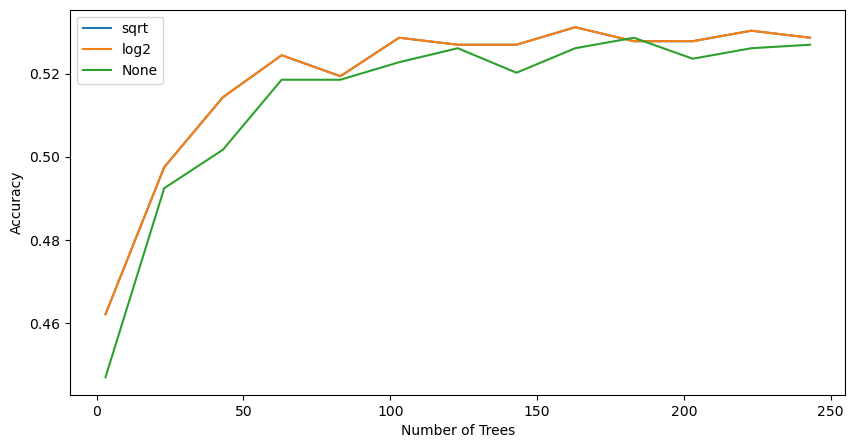

In [6]:
# Train and test set (30% test)
X = df.drop(columns = ['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Three random forest classifiers, each with diff method of selection for max_features
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest with max_features = sqrt(n_features)
rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=seed)

# Random Forest with max_features = log2(n_features)
rfc_log2 = RandomForestClassifier(n_estimators=100, max_features='log2', random_state=seed)

# Random Forest with max_features = None
rfc_none = RandomForestClassifier(n_estimators=100, max_features=None, random_state=seed)

# Training the models in a for loop with number of trees in range [3, 263] with step size 20
accuracy = []
accuracy_log2 = []
accuracy_none = []

for n_trees in range(3, 263, 20):
    rfc.set_params(n_estimators=n_trees)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

    rfc_log2.set_params(n_estimators=n_trees)
    rfc_log2.fit(X_train, y_train)
    y_pred = rfc_log2.predict(X_test)
    accuracy_log2.append(accuracy_score(y_test, y_pred))

    rfc_none.set_params(n_estimators=n_trees)
    rfc_none.fit(X_train, y_train)
    y_pred = rfc_none.predict(X_test)
    accuracy_none.append(accuracy_score(y_test, y_pred))

# Plotting OOB scores against # of trees for each classifier
plt.figure(figsize=(10, 5))
plt.plot(range(3, 263, 20), accuracy, label='sqrt')
plt.plot(range(3, 263, 20), accuracy_log2, label='log2')
plt.plot(range(3, 263, 20), accuracy_none, label='None')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy: 0.5294612794612794


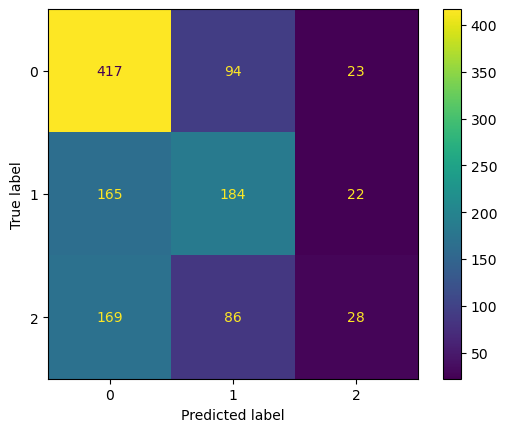

In [28]:
# Classifier with the best generalization score
accuracy1 = accuracy

# Confusion matrix for the sqrt classifier
rfc.set_params(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rfc.classes_)
disp.plot()

# Print accuracy
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

In [29]:
# Visualize one arbitrary tree from one of the forests
estimator = rfc.estimators_[5]
dot_data = export_graphviz(estimator, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

import os
print(os.environ['CONDA_PREFIX'])
os.environ['PATH'] = os.environ['PATH']+';'+ '/usr/lib/x86_64-linux-gnu/graphviz'

# Show the tree
Image(graph.create_png())

C:\Users\Riley\anaconda3


InvocationException: GraphViz's executables not found

**Written answer:**

No, this is not a good model. It does not predict accurately at all for the predicted label '2', believing that a draw occurs when it does not a significant amount of the time. Furthermore, there is a lot of inaccuracy for the predicted label '1', predicting '1' when the true label is 0 or 2 the same amount of times as it correctly predicts 1. It's most accurate when predicting label 0, but as we know from above the dataset isn't that balanced and this could just be a result of there being more 0 entries than any other entry in the target variable.

### Q2.2 - <span style="color:red">[15]</span> - Create a barplot reporting feature importance for the best model (found in Q2.1). For this purpose, instead of using mean decrease in impurity as the metric to calculate the importance scores, we want to use the permutation importance algorithm (check out the [documentation](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance)). Because, impurity-based feature importances can be misleading for high cardinality features (many unique values), but permutation feature importances do not have a bias toward high-cardinality features and can be computed on a left-out test set. The x-axis of your barplot should reflect the features' names and the y-axis their mean accuracy decrease. Each bar must also show its error bar. According to this barpot, what are the 3 most important features?

Use [`sklearn.inspection.permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) with `n_repeats=10` (because the computation for full permutation importance is very costly, so let's limit it).

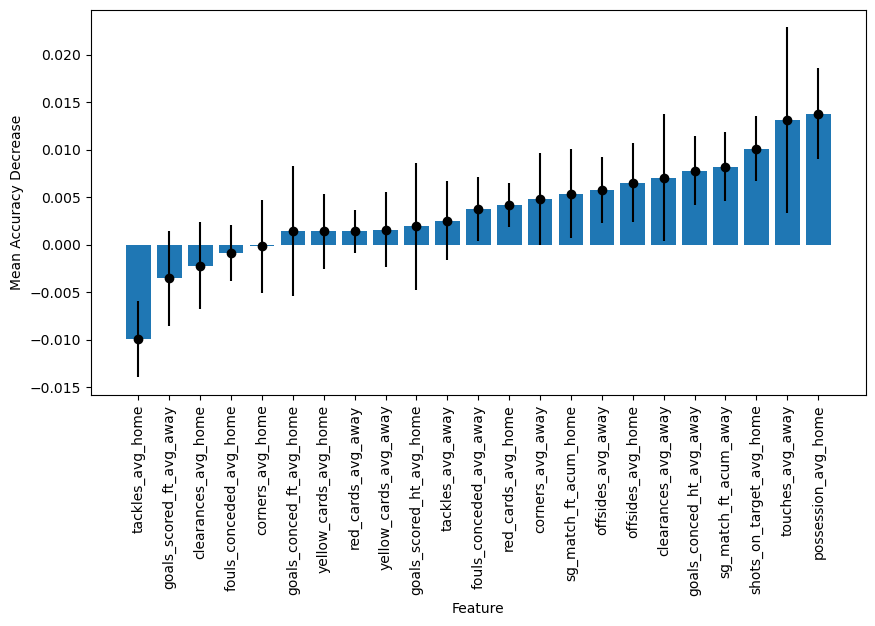

In [21]:
# Barplot reporting feature importance for the sqrt classifier using permutation importance, n_repeats = 10
from sklearn.inspection import permutation_importance
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=seed)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 5))
plt.bar(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel('Feature')
plt.ylabel('Mean Accuracy Decrease')
plt.xticks(rotation=90)
plt.errorbar(np.arange(0, len(X.columns)), result.importances_mean[sorted_idx], yerr=result.importances_std[sorted_idx], fmt='o', color='black')
plt.show()

**Written answer:**

The three most important features are: posession_avg_home, touches_avg_away, and shots_on_target_avg_home

### Q3.1 - <span style="color:red">[20]</span> - XGBoosting
Now, we'll repeat the process for the XGB model, using an [```XGBClassifier``` object](https://xgboost.readthedocs.io/en/latest/python/python_api.html).

1. Use cross-validated grid search (with 5 stratified validation sets) to find the best values from the lists below for `XGBClassifier`. Use only 40% of the training set for your search, otherwise it will take a long time. Take advantage of `n_jobs=-1`. Report the optimal values found per argument.
 - Number of trees: [100, 150, 200]
 - Maximum depth: [8, 25, 42]
 - Learning rate: [0.1, 0.5, 0.9]

2. Train a `XGBClassifier` using the optimal values and report its accuracy as well as the confusion matrix. Store the accuracy in a variable called **accuracy2**.
3. Compare the confusion matrix and the accuracy of this model with the previous one. Is the performance of XGBoost better than the RandomForestClassifier?

**Use `random_state=seed` in all methods accepting this argument.**

In [26]:
# Grid search for the best hyperparameters for XGBClassifier
# %pip install xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=seed)

param_grid = {
    'n_trees': [100, 150, 200],
    'max_depth': [8, 25, 42],
    'learning_rate': [0.1, 0.5, 0.9]
}

# Use only 40% of training data for grid search
X_train_gs, _, y_train_gs, _ = train_test_split(X_train, y_train, test_size=0.6, random_state=seed)

grid_search = GridSearchCV(xgb, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed), scoring='accuracy')
grid_search.fit(X_train_gs, y_train_gs)

# Best hyperparameters
print(grid_search.best_params_)

{'learning_rate': 0.9, 'max_depth': 8, 'n_trees': 100}


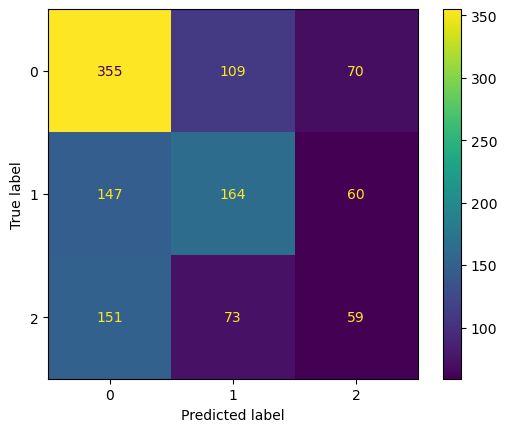

Accuracy: 0.48653198653198654


In [27]:
# Train XGBClassifier with best hyperparameters
xgb.set_params(**grid_search.best_params_)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# Confusion matrix and accuracy score for XGBClassifier
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=xgb.classes_)
disp.plot()
plt.show()
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

**Written answer:**

Here

### Q3.2 - <span style="color:red">[4]</span> - **Written question:** How could you potentially improve the accuracy of the models? Write no more than 5 sentences (no code).

**Written answer:**

Here

### Q3.3 - <span style="color:red">[8]</span> - Create a barplot reporting permutation feature importances for your final XGB model. What are the top 3 most important features?

Use [`sklearn.inspection.permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) with `n_repeats=10` (because the computation for full permutation importance is very costly, so let's limit it).

In [ ]:
#

**Written answer:**

Here

$$The\;End$$